# Spike sorting performance against spike collisions (figure 2-3-5)

In this notebook, we describe how to generate the figures for all the sudies, i.e. for all rate and correlation levels, in a systematic manner. However, while by default the figures were saved as .pdf, here we will modify the ranges of rates and correlations to display only a single figures. Feel free to modify the scripts in order to display only a single figures

In [1]:
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import gridspec

import MEArec as mr
import spikeinterface.full as si

In [2]:
study_base_folder = Path('../data/study/')

## Plot global spike sorting performance (Figure 2)

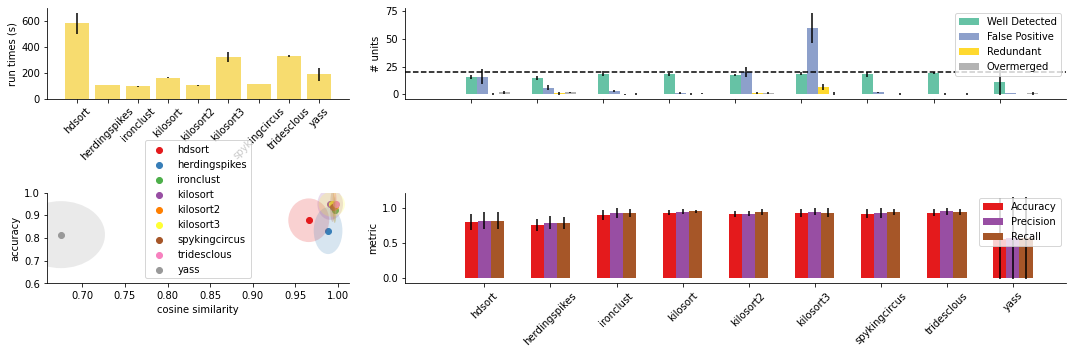

In [1]:
res = {}

rate_levels = [5]
corr_levels = [0]

for rate_level in rate_levels:
    for corr_level in corr_levels:

        fig = plt.figure(figsize=(15,5))
        gs = gridspec.GridSpec(2, 3, figure=fig)

        study_folder = study_base_folder / f'20cells_5noise_{corr_level}corr_{rate_level}rate_Neuronexus-32'
        
        study = si.GroundTruthStudy(study_folder)
        study.run_comparisons(exhaustive_gt=True)

        ax_1 = plt.subplot(gs[0, 0])
        ax_2 = plt.subplot(gs[0, 1:])
        ax_3 = plt.subplot(gs[1, 1:])
        ax_4 = plt.subplot(gs[1, 0])

        for ax in [ax_1, ax_2, ax_3, ax_4]:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)

        ax_2.tick_params(labelbottom=False)
        ax_2.set_xlabel('')

        si.plot_gt_study_run_times(study, ax=ax_1)
        si.plot_gt_study_unit_counts(study, ax=ax_2)
        si.plot_gt_study_performances_averages(study, ax=ax_3)
        si.plot_gt_study_performances_by_template_similarity(study, ax=ax_4)

        plt.tight_layout()

## Plot collision recall as function of the lags (Figure 3)

Python 3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0] does not support parallel processing
Python 3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0] does not support parallel processing
Python 3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0] does not support parallel processing
Python 3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0] does not support parallel processing
Python 3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0] does not support parallel processing
Python 3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0] does not support parallel processing
Python 3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0] does not support parallel processing
Python 3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0] does not support parallel processing
Python 3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0] does not support parallel processing
Python 3.6.9 (default, Jan 26 2021, 15:33:00) 
[GCC 8.4.0] does not support parallel processing


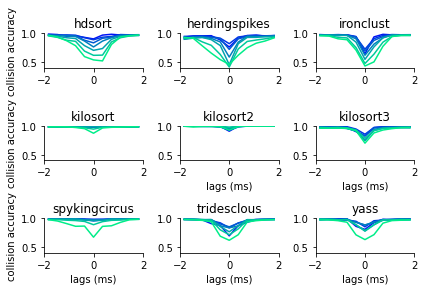

In [2]:
for rate_level in rate_levels:
    for corr_level in corr_levels:
        study_folder = f'../data/study/20cells_5noise_{corr_level}corr_{rate_level}rate_Neuronexus-32'
        res[(rate_level, corr_level)] = si.CollisionGTStudy(study_folder)
        res[(rate_level, corr_level)].run_comparisons(exhaustive_gt=True, collision_lag=2, nbins=11)

        for rec_name in res[(rate_level, corr_level)].rec_names:
            res[(rate_level, corr_level)].compute_waveforms(rec_name)

        si.plot_study_comparison_collision_by_similarity(res[(rate_level, corr_level)], 
                                                         show_legend=False, ylim=(0.4, 1))
        plt.tight_layout()


## Plot collision recall as function of the lag and/or cosine similarity (supplementary figures)

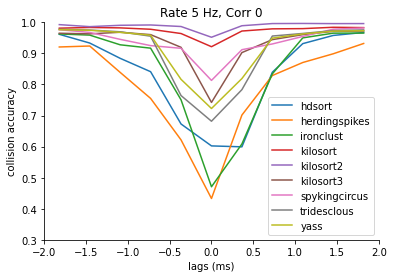

In [3]:
gs = gridspec.GridSpec(len(rate_levels), len(corr_levels))
for i, rate_level in enumerate(rate_levels):
    for j, corr_level in enumerate(corr_levels):
        
        ax = plt.subplot(gs[i, j])

        if i == 0 and j == 0:
            show_legend = True
        else:
            show_legend = False
        si.plot_study_comparison_collision_by_similarity_range(res[(rate_level, corr_level)], show_legend=show_legend, similarity_range=[0.5, 1], ax=ax, ylim=(0.3, 1))

        ax.set_title(f'Rate {rate_level} Hz, Corr {corr_level}' )
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        if rate_level != rate_levels[-1]:
            ax.tick_params(labelbottom=False)
            ax.set_xlabel('')
        else:
            ax.set_xlabel('lags (ms)')

        if corr_level != corr_levels[0]:
            ax.tick_params(labelleft=False)
            ax.set_ylabel('')
        else:
            ax.set_ylabel('collision accuracy')


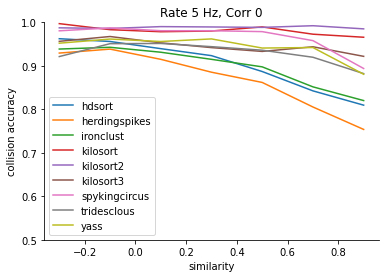

In [4]:
gs = gridspec.GridSpec(len(rate_levels), len(corr_levels))
for i, rate_level in enumerate(rate_levels):
    for j, corr_level in enumerate(corr_levels):
        
        ax = plt.subplot(gs[i, j])

        if i == 0 and j == 0:
            show_legend = True
        else:
            show_legend = False
        si.plot_study_comparison_collision_by_similarity_ranges(res[(rate_level, corr_level)], show_legend=show_legend, ax=ax)

        ax.set_title(f'Rate {rate_level} Hz, Corr {corr_level}' )
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        if rate_level != rate_levels[-1]:
            ax.tick_params(labelbottom=False)
            ax.set_xlabel('')
        else:
            ax.set_xlabel('similarity')

        if corr_level != corr_levels[0]:
            ax.tick_params(labelleft=False)
            ax.set_ylabel('')
        else:
            ax.set_ylabel('collision accuracy')


## Plot average collision recall over multiple conditions, as function of the lags (Figure 5)

Text(0, 0.5, 'collision accuracy')

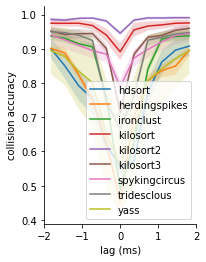

In [9]:
rate_levels = [5,10,15]
corr_levels = [0, 0.1, 0.2]

gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, 0])
curves = {}
for i, rate_level in enumerate(rate_levels):
    for j, corr_level in enumerate(corr_levels):
        
        study_folder = f'../data/study/20cells_5noise_{corr_level}corr_{rate_level}rate_Neuronexus-32'
        res[(rate_level, corr_level)] = si.CollisionGTStudy(study_folder)
        res[(rate_level, corr_level)].run_comparisons(exhaustive_gt=True, collision_lag=2, nbins=11)
        res[(rate_level, corr_level)].precompute_scores_by_similarities()
        
        for sorter_name in res[(rate_level, corr_level)].sorter_names:
            data = res[(rate_level, corr_level)].get_mean_over_similarity_range([0.5, 1], sorter_name)
            if not sorter_name in curves:
                curves[sorter_name] = [data]
            else:
                curves[sorter_name] += [data]

lags = res[(rate_level, corr_level)].get_lags()
for sorter_name in res[(rate_level, corr_level)].sorter_names:
    curves[sorter_name] = np.array(curves[sorter_name])
    mean_sorter = curves[sorter_name].mean(0)
    std_sorter = curves[sorter_name].std(0)
    ax.plot(lags[:-1] + (lags[1]-lags[0]) / 2, mean_sorter, label=sorter_name)
    ax.fill_between(lags[:-1] + (lags[1]-lags[0]) / 2, mean_sorter-std_sorter,mean_sorter+std_sorter, alpha=0.2)

ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('lag (ms)')
ax.set_ylabel('collision accuracy')

## Plotting the average collision recall over multiple conditions, as function of the similarity

/home/cure/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cure/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/cure/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cure/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/cure/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/cure/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


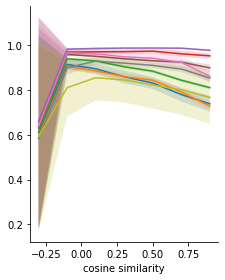

In [5]:
rate_levels = [5,10,15]
corr_levels = [0, 0.1, 0.2]
res = {}
gs = gridspec.GridSpec(1, 2)
ax = plt.subplot(gs[0, 0])
curves = {}
similarity_ranges = np.linspace(-0.4, 1, 8)
for i, rate_level in enumerate(rate_levels):
    for j, corr_level in enumerate(corr_levels):
        
        study_folder = f'../data/study/20cells_5noise_{corr_level}corr_{rate_level}rate_Neuronexus-32'
        res[(rate_level, corr_level)] = si.CollisionGTStudy(study_folder)
        res[(rate_level, corr_level)].run_comparisons(exhaustive_gt=True, collision_lag=2, nbins=11)
        res[(rate_level, corr_level)].precompute_scores_by_similarities()
        
        for sorter_name in res[(rate_level, corr_level)].sorter_names:

            all_similarities = res[(rate_level, corr_level)].all_similarities[sorter_name]
            all_recall_scores = res[(rate_level, corr_level)].all_recall_scores[sorter_name]

            order = np.argsort(all_similarities)
            all_similarities = all_similarities[order]
            all_recall_scores = all_recall_scores[order, :]

            mean_recall_scores = []
            std_recall_scores = []
            for k in range(similarity_ranges.size - 1):
                cmin, cmax = similarity_ranges[k], similarity_ranges[k + 1]
                amin, amax = np.searchsorted(all_similarities, [cmin, cmax])
                value = np.mean(all_recall_scores[amin:amax])
                mean_recall_scores += [np.nan_to_num(value)]

            xaxis = np.diff(similarity_ranges)/2 + similarity_ranges[:-1]

            data = mean_recall_scores
            if not sorter_name in curves:
                curves[sorter_name] = [data]
            else:
                curves[sorter_name] += [data]

for sorter_name in res[(rate_level, corr_level)].sorter_names:
    curves[sorter_name] = np.array(curves[sorter_name])
    mean_sorter = curves[sorter_name].mean(0)
    std_sorter = curves[sorter_name].std(0)
    ax.plot(xaxis, mean_sorter, label=sorter_name)
    ax.fill_between(xaxis, mean_sorter-std_sorter,mean_sorter+std_sorter, alpha=0.2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('cosine similarity')
#ax.set_ylabel('collision accuracy')
#ax.set_yticks([])

plt.tight_layout()